In [1]:
#Import Packages
import sys
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import colors
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from IPython.display import Image
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas.core.common import SettingWithCopyWarning
from pathlib import Path
from scipy.stats import probplot, chi2_contingency, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,plot_confusion_matrix,plot_roc_curve,roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
import scikitplot as skplt
from yellowbrick.model_selection import FeatureImportances
import scipy.stats as stats
import joblib
import os
%matplotlib inline

In [2]:
#Loading and preparing the dataset
app_data = pd.read_csv('application_record.csv')
credit_record = pd.read_csv('credit_record.csv')

In [3]:
#Data Exploration & Visualization
#Exploring Application Records
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
print("Number of datapoints for application records: {}".format(len(app_data)))
print("Number of unique clients in dataset: {}".format(len(app_data.ID.unique())))

Number of datapoints for application records: 438557
Number of unique clients in dataset: 438510


Text(0.5, 1.0, 'Missing Data for application records dataset')

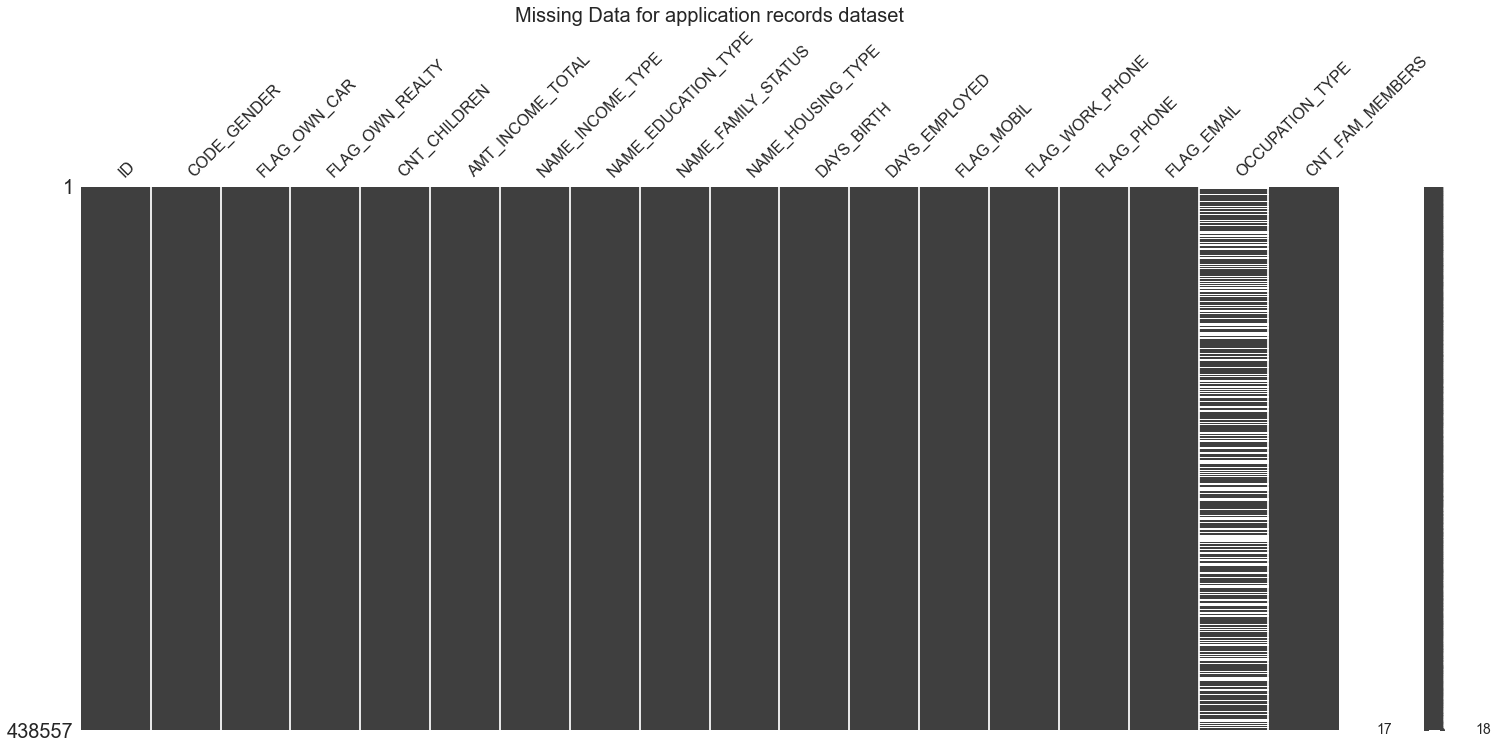

In [6]:
#Missing Values
plt_missing_1 = msno.matrix(app_data)

plt_missing_1.set_title("Missing Data for application records dataset",fontsize=20)

In [7]:
#Exploring Credit Records
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [8]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [9]:
print("Number of datapoints for credit records: {}".format(len(credit_record)))
print("Number of unique clients in dataset: {}".format(len(credit_record.ID.unique())))

Number of datapoints for credit records: 1048575
Number of unique clients in dataset: 45985


Text(0.5, 1.0, 'Missing Data for credit records dataset')

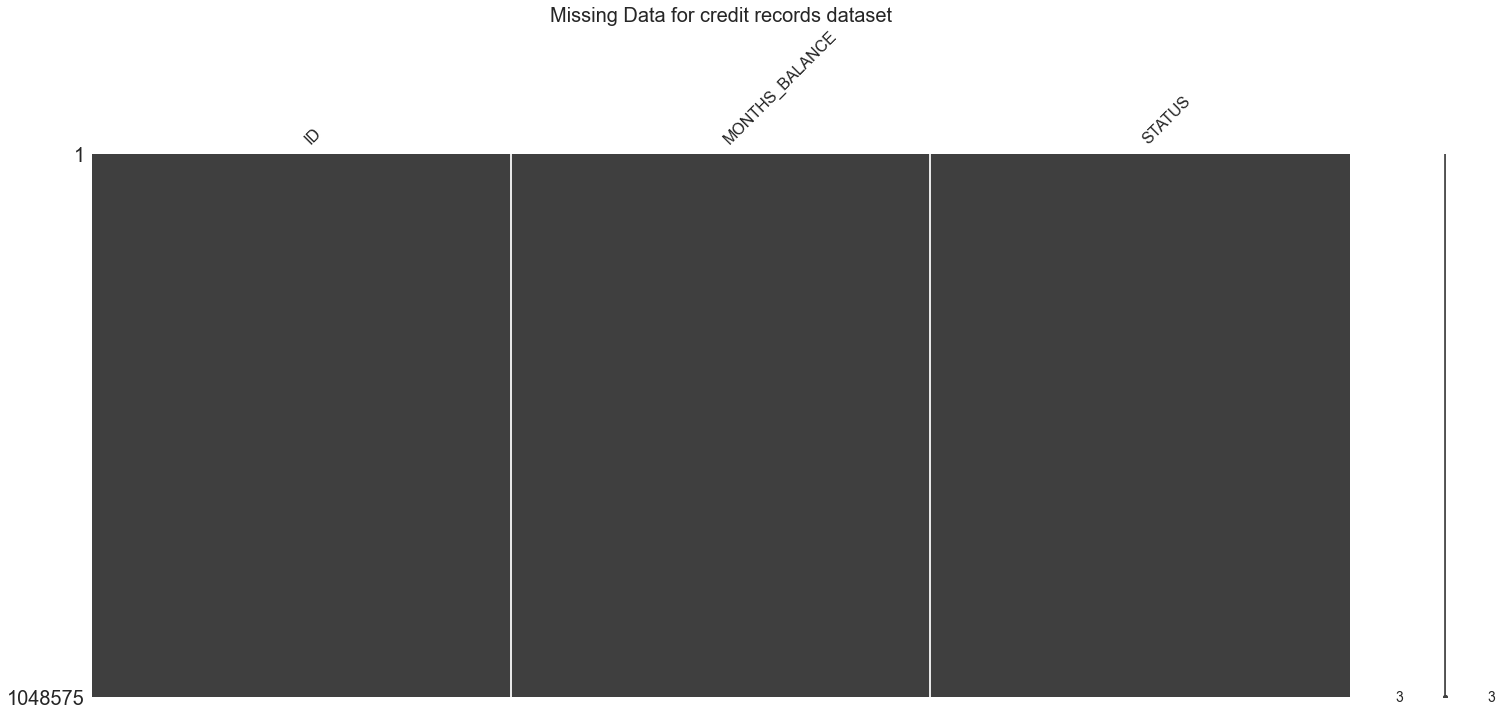

In [10]:
#Missing Values
plt_missing_2 = msno.matrix(credit_record)

plt_missing_2.set_title("Missing Data for credit records dataset",fontsize=20)

In [11]:
#Exploring Categorical Variables
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL']

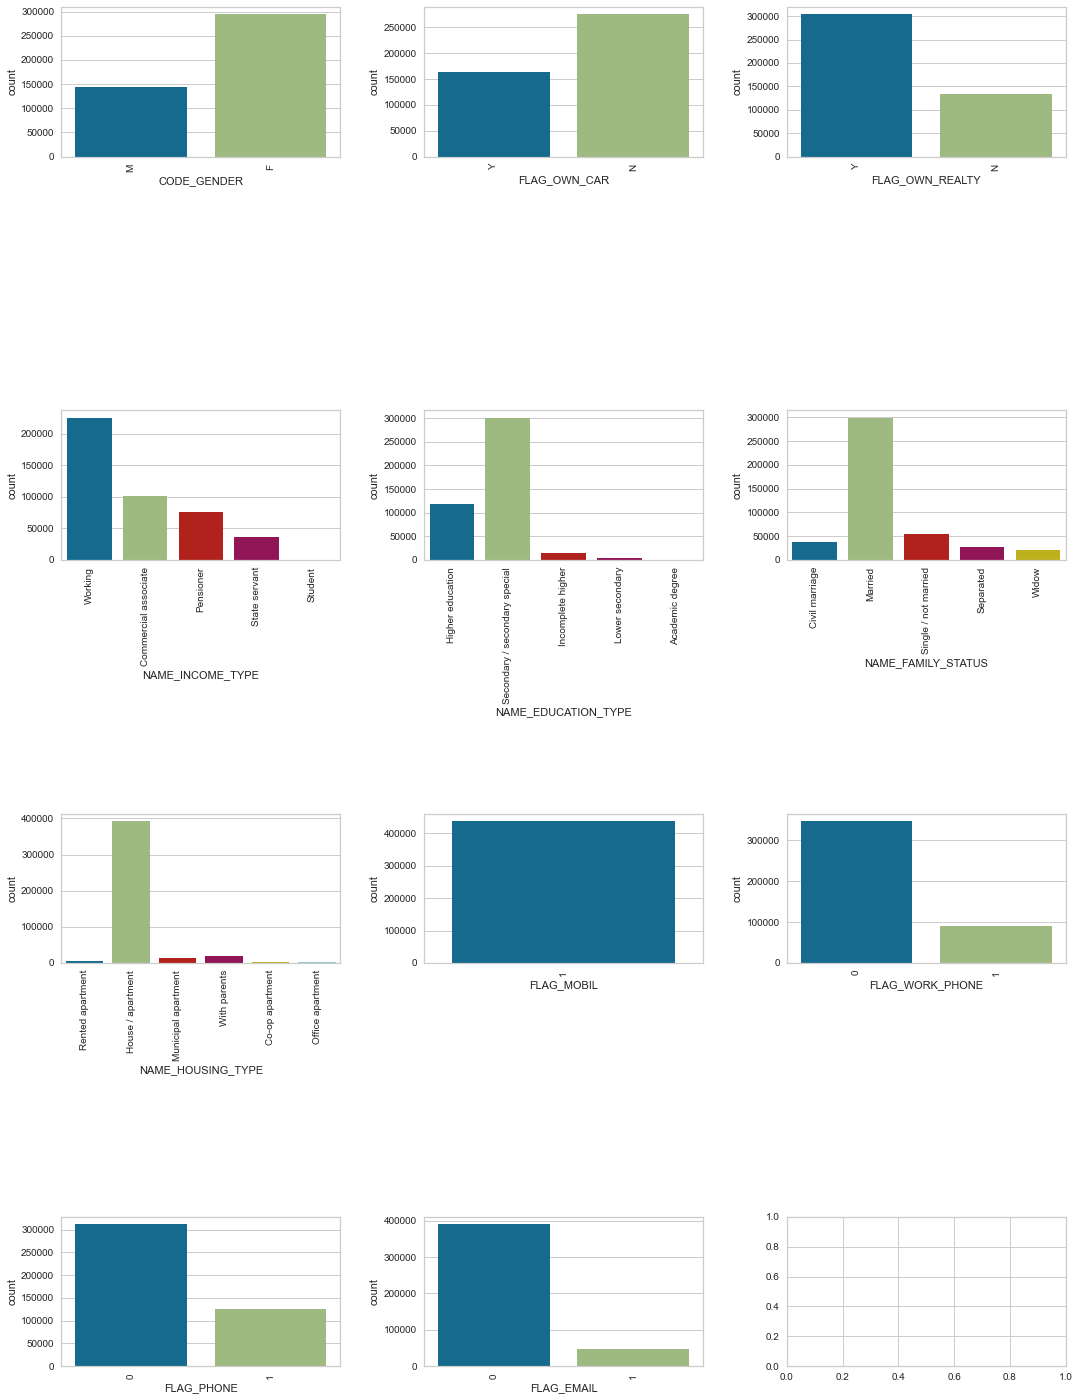

In [12]:
figure, axes = plt.subplots(4,3, figsize=(18,25))
axes_flatteled = axes.flatten()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=1.7)


for idx, feat in enumerate(categorical_features):
    sns.countplot(ax=axes_flatteled[idx], data=app_data, x=feat)
    axes_flatteled[idx].set_xticklabels(axes_flatteled[idx].get_xticklabels(), rotation =90)

In [13]:
#Exploring Numerical Variables
numerical_features = ['DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS']

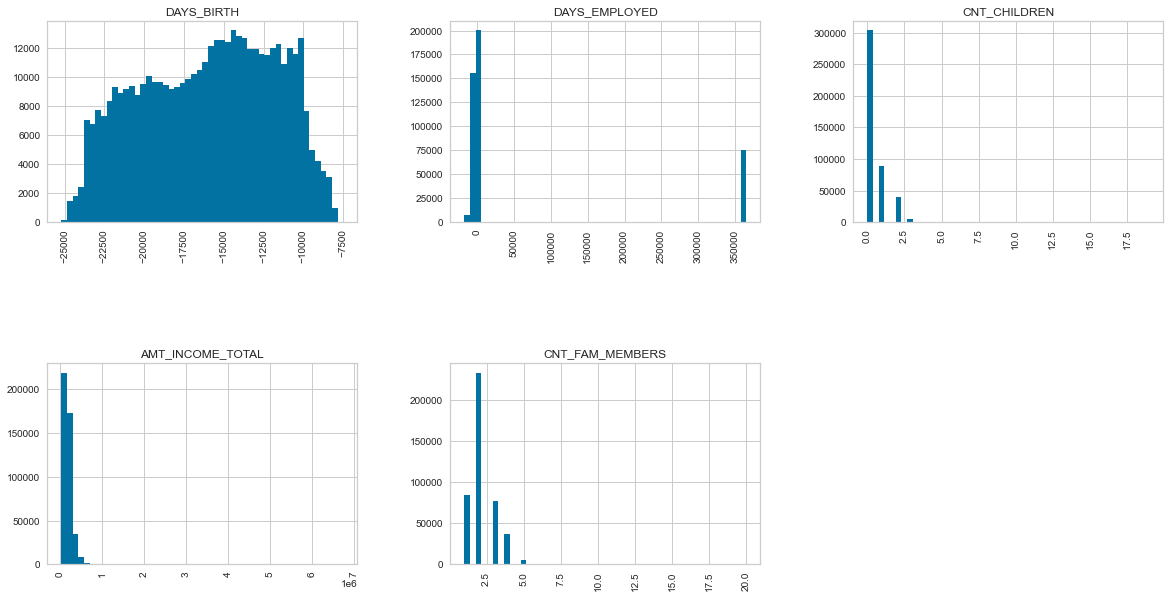

In [14]:
app_data[numerical_features].hist(layout=(2,3), figsize=(20,10),bins=50, xrot=90)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.7)

plt.show()

In [15]:
#Merging Datasets
app_data = app_data.sort_values('ID')
credit_record = credit_record.sort_values('ID')
#Map the status to bad or good
credit_record['STATUS_BINARY'] = credit_record['STATUS']
credit_record = credit_record.replace({'STATUS_BINARY' :{'C' : 'Good','X' : 'Good','0' : 'Bad', '1' : 'Bad','2' : 'Bad','3' : 'Bad','4' : 'Bad','5' : 'Bad'}})
result_df = credit_record.value_counts(subset=['ID', 'STATUS_BINARY']).unstack(fill_value=0).reset_index()
#decide the user is good or bad based on his/her history majority
result_df.loc[(result_df['Good'] / result_df['Bad'] >= 1), 'Status'] = 1
result_df.loc[(result_df['Good'] / result_df['Bad'] < 1 ), 'Status'] = 0
result_df['Status'] = result_df['Status'].astype(int)
final_data = app_data.merge(result_df, how='inner', on=['ID'])
#define the rate of good debts for each user
final_data['rate'] = (final_data['Good']+0.1) / (final_data['Bad']+0.1)
final_data.drop(['Good','Bad'],axis=1,inplace = True);
#Renaming columns
final_data.columns = ['ID', 'Gender', 'Car', 'Realty', 'Children', 'Income', 'Income_Type',
                        'Education_Type', 'Family_Status', 'Housing_Type',  'Age', 'Years_Experience' , 'Mobile_Phone', 'Work_Phone', 
                        'Phone', 'Email', 'Job_Title', 'Total_Family' , 'Status','rate']
final_data.head(5)

,ID,Gender,Car,Realty,Children,Income,Income_Type,Education_Type,Family_Status,Housing_Type,Age,Years_Experience,Mobile_Phone,Work_Phone,Phone,Email,Job_Title,Total_Family,Status,rate
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1,6.714286
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1,6.238095
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1,3.253521
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1,1.476190
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1,51.000000


<AxesSubplot:>

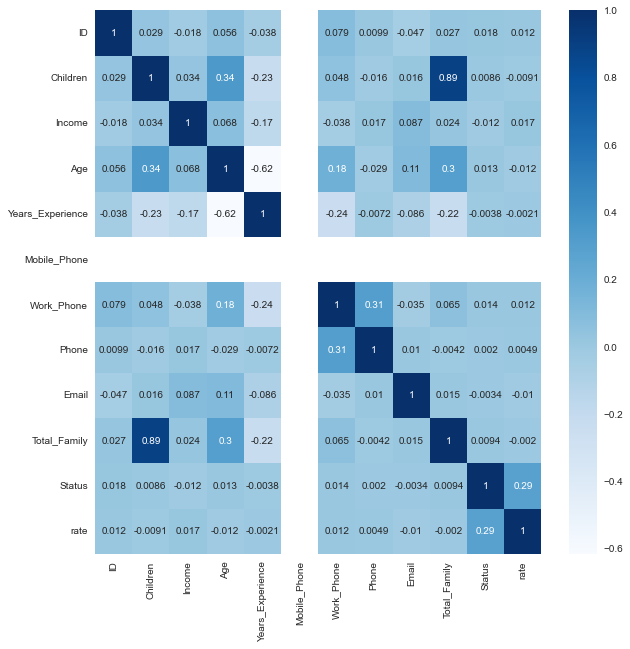

In [16]:
#Correlation between features
corr = final_data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap="Blues", annot=True)

In [17]:
final_data.drop(['Children','Mobile_Phone'],axis=1,inplace=True)

In [18]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                36457 non-null  int64  
 1   Gender            36457 non-null  object 
 2   Car               36457 non-null  object 
 3   Realty            36457 non-null  object 
 4   Income            36457 non-null  float64
 5   Income_Type       36457 non-null  object 
 6   Education_Type    36457 non-null  object 
 7   Family_Status     36457 non-null  object 
 8   Housing_Type      36457 non-null  object 
 9   Age               36457 non-null  int64  
 10  Years_Experience  36457 non-null  int64  
 11  Work_Phone        36457 non-null  int64  
 12  Phone             36457 non-null  int64  
 13  Email             36457 non-null  int64  
 14  Job_Title         25134 non-null  object 
 15  Total_Family      36457 non-null  float64
 16  Status            36457 non-null  int32 

<AxesSubplot:>

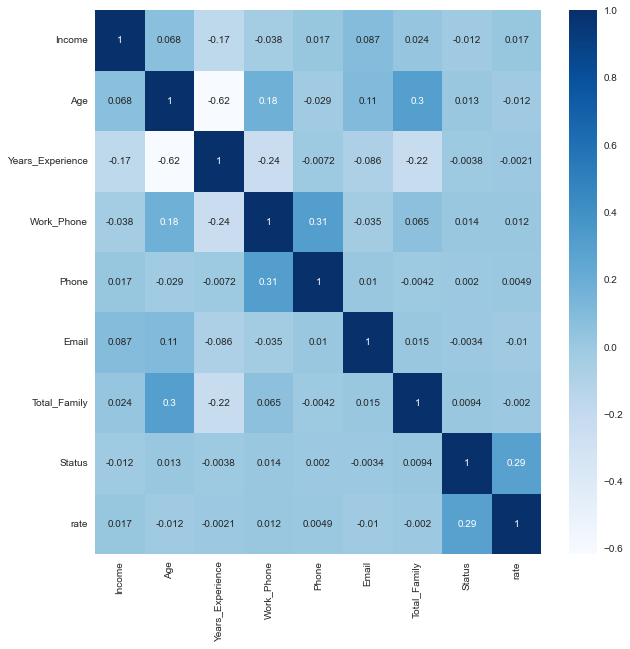

In [19]:
corr = final_data.drop('ID',axis=1).corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap="Blues", annot=True)

In [20]:
#Data Preprocessing
#Handling Missing Values
final_data.isna().sum()

ID                      0
Gender                  0
Car                     0
Realty                  0
Income                  0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Age                     0
Years_Experience        0
Work_Phone              0
Phone                   0
Email                   0
Job_Title           11323
Total_Family            0
Status                  0
rate                    0
dtype: int64

In [21]:
final_data = final_data.dropna()

In [22]:
#Handling Numerical Values
#Convert Age and Year of Experience to Year format
final_data['Age'] = final_data['Age']/(-1*365)
final_data['Years_Experience'] = final_data['Years_Experience']/(-1*365)
final_data.head(5)

,ID,Gender,Car,Realty,Income,Income_Type,Education_Type,Family_Status,Housing_Type,Age,Years_Experience,Work_Phone,Phone,Email,Job_Title,Total_Family,Status,rate
2,5008806,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,0,0,0,Security staff,2.0,1,3.253521
3,5008808,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,0,1,1,Sales staff,1.0,1,1.476190
4,5008809,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,0,1,1,Sales staff,1.0,1,51.000000
5,5008810,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,0,1,1,Sales staff,1.0,1,3.459016
6,5008811,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,0,1,1,Sales staff,1.0,1,5.426230


In [23]:
#Handling Categorical Values
#Label Encoding
Categorical_features = ['Realty', 'Gender','Car','Income_Type','Education_Type','Family_Status','Housing_Type','Job_Title']

for col in Categorical_features:
    print(final_data[col].unique())
    
final_data.info()

['Y' 'N']
['M' 'F']
['Y' 'N']
['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
['Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 2 to 36456
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                25134 non-null  int64  
 1   Gender            25134 non-null  object 
 2   Car    

In [24]:
le = preprocessing.LabelEncoder()

for col in Categorical_features:
    final_data[col] = le.fit_transform(final_data[col])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 2 to 36456
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                25134 non-null  int64  
 1   Gender            25134 non-null  int32  
 2   Car               25134 non-null  int32  
 3   Realty            25134 non-null  int32  
 4   Income            25134 non-null  float64
 5   Income_Type       25134 non-null  int32  
 6   Education_Type    25134 non-null  int32  
 7   Family_Status     25134 non-null  int32  
 8   Housing_Type      25134 non-null  int32  
 9   Age               25134 non-null  float64
 10  Years_Experience  25134 non-null  float64
 11  Work_Phone        25134 non-null  int64  
 12  Phone             25134 non-null  int64  
 13  Email             25134 non-null  int64  
 14  Job_Title         25134 non-null  int32  
 15  Total_Family      25134 non-null  float64
 16  Status            25134 non-null  int32 

In [25]:
#Final Data after processing
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,25134.0,5.078838e+06,41941.018788,5.008806e+06,5.042228e+06,5.079004e+06,5.115604e+06,5.150487e+06
Gender,25134.0,3.781332e-01,0.484931,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Car,25134.0,4.183974e-01,0.493306,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Realty,25134.0,6.549296e-01,0.475401,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Income,25134.0,1.948339e+05,104510.987243,2.700000e+04,1.350000e+05,1.800000e+05,2.250000e+05,1.575000e+06
Income_Type,25134.0,2.681825e+00,1.773317,0.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
Education_Type,25134.0,3.060038e+00,1.358220,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
Family_Status,25134.0,1.316862e+00,0.893762,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
Housing_Type,25134.0,1.322074e+00,1.016785,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
Age,25134.0,4.053161e+01,9.553342,2.051781e+01,3.277808e+01,3.985479e+01,4.777534e+01,6.742740e+01


In [26]:
#Split dataset into Train and Test Datasets
from sklearn.model_selection import train_test_split
X = final_data.drop(['ID','Status'],axis = 1)
Y = final_data['Status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [27]:
#Over-Sampling using Adaptive Synthetic (ADASYN) Algorithm
os = ADASYN()
X_train, Y_train = os.fit_resample(X_train,Y_train)

In [28]:
#Scaling the data
normalizer = preprocessing.StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)

In [29]:
#Machine Learning Algorithms
#Logisitc Regression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test, Y_predict)))
print(pd.DataFrame(confusion_matrix(Y_test,Y_predict)))

Accuracy Score is 0.87647
      0     1
0  2296     0
1   621  2110
